In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# VACUUM

In [37]:
#Constants

eps0 = 8.8541878128e-12
mu0 = 1.256637062e-6
c = 1/np.sqrt(eps0*mu0)
imp0 = np.sqrt(mu0/eps0)

# values for other than vakuum, epsilon (eps) also can be an array of permativities in the y direction for every step, mu also can be so

mu = mu0
eps = eps0
v = 1/np.sqrt(eps*mu)
imp = np.sqrt(mu/eps)

j_max = 500  #size of y
n_max = 2000  #size of t
j_source = 250 #space step of j_source

E_x = np.zeros(j_max)
H_z = np.zeros(j_max)

#can be replaced with just E_x and H_z and is not important but or simplicity, it can be better do define it

E_x_prev = np.zeros(j_max)
H_z_prev = np.zeros(j_max)

lambda_min = 350e-9  #minimum wavelength
dx = lambda_min/20
dt = dx/c

In [38]:
#Defining source:

def Source_Func(t):
    tau = 30   # in time steps
    t_0 = tau*3     # delay for source to work
    lambda_0 = 550e-9  #defines the frequency of the source
    w0 = 2*np.pi*c/lambda_0 
    return np.exp(-(t-t_0)**2/tau**2)*np.sin(w0*t*dt)

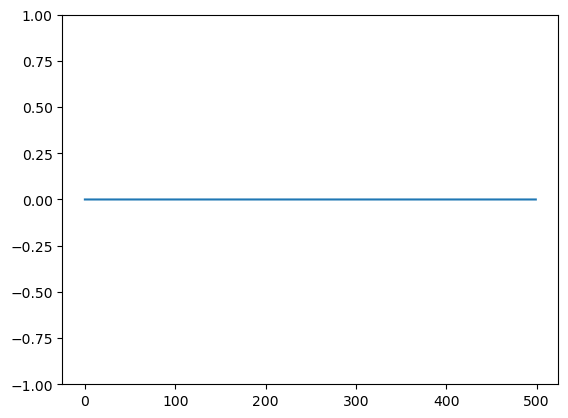

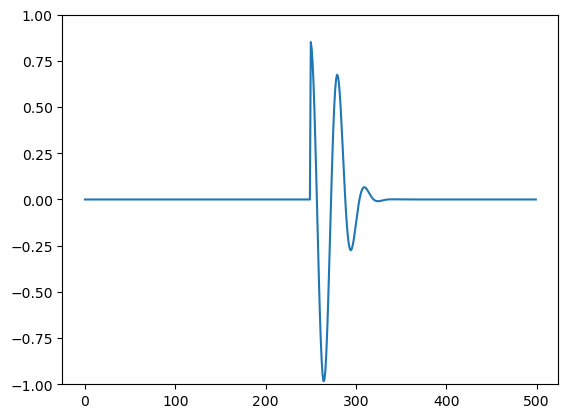

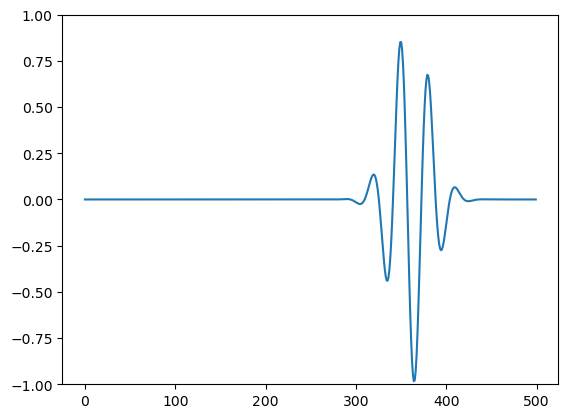

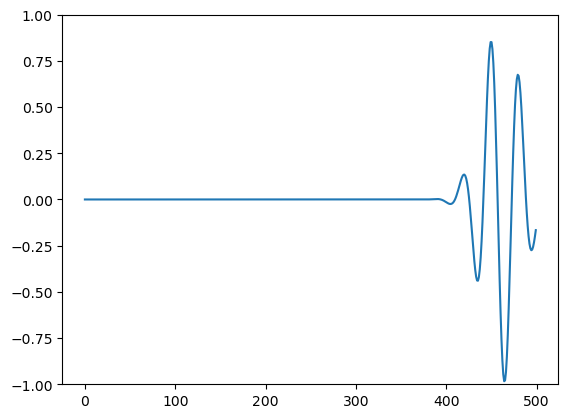

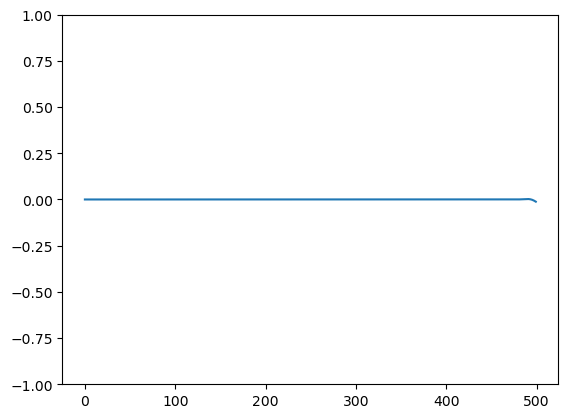

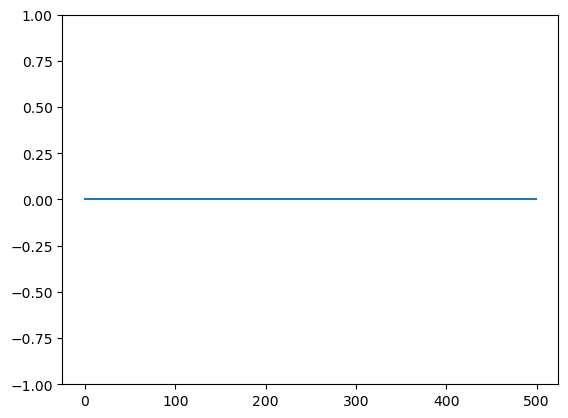

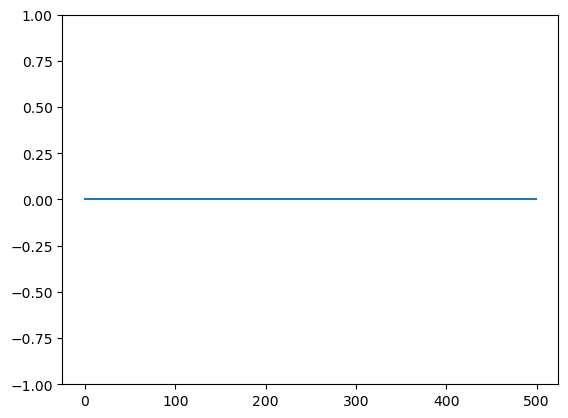

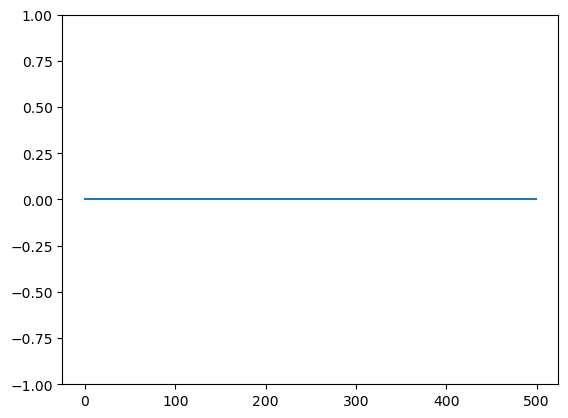

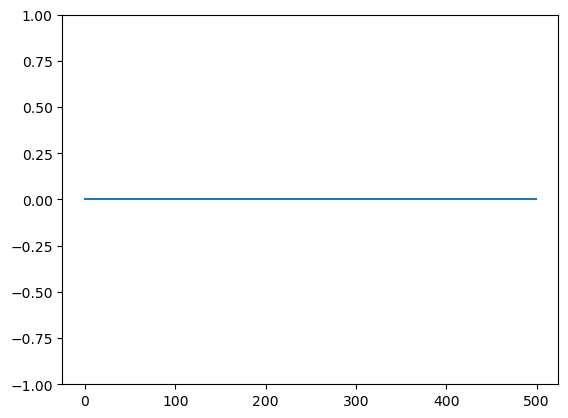

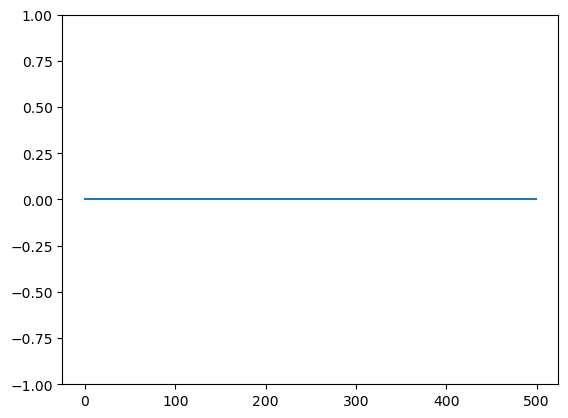

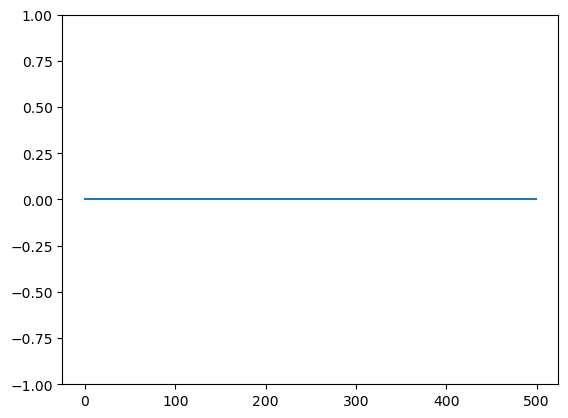

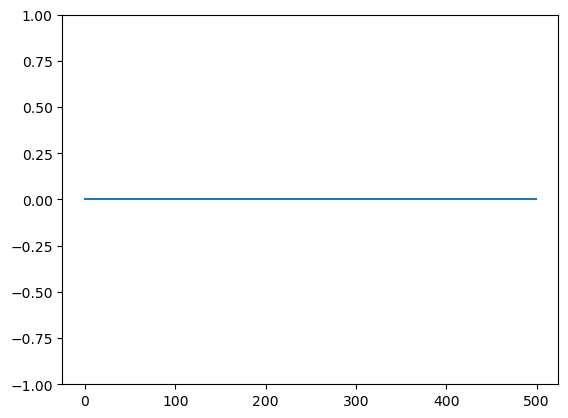

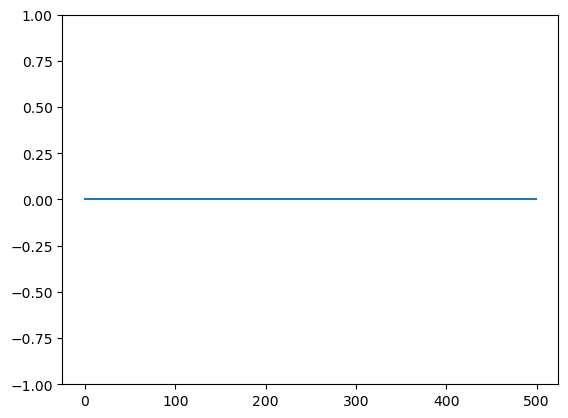

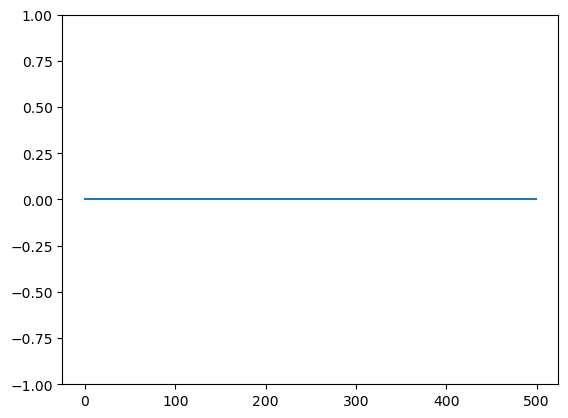

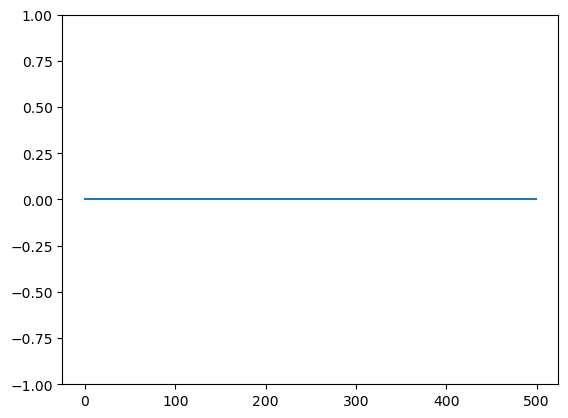

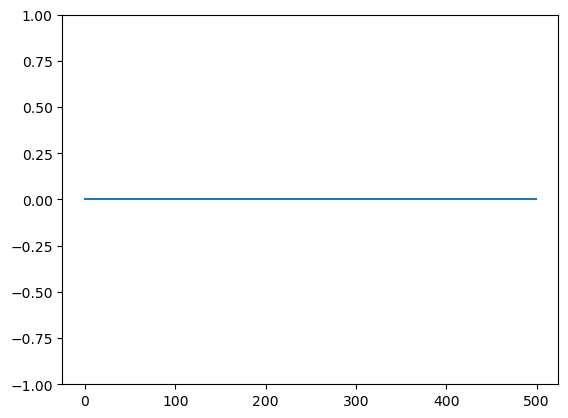

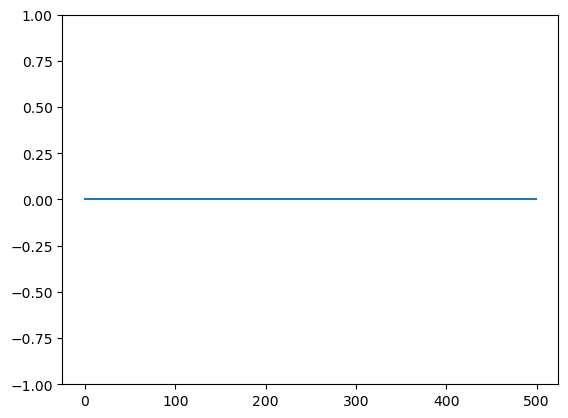

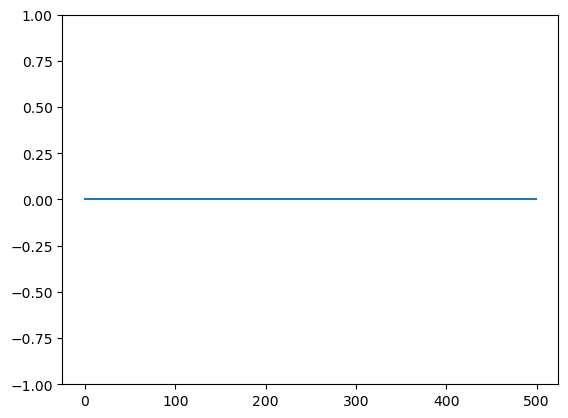

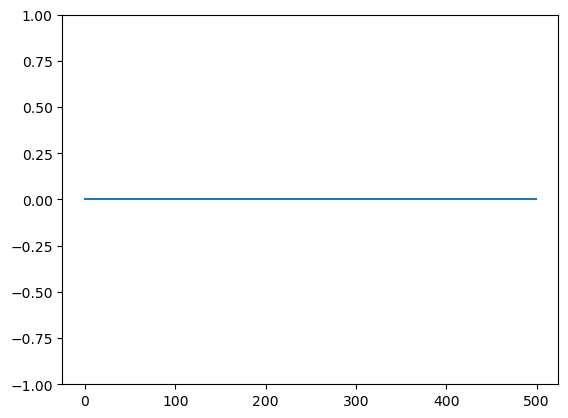

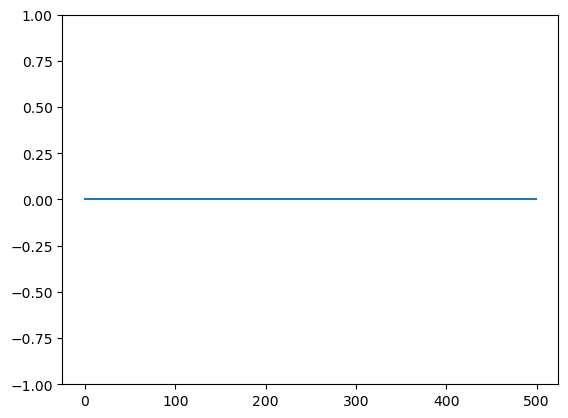

In [39]:

#The loop, Simulating light in a vacuum

for n in range(n_max):
    #update magnetic field boundaries, if we want the wave to propagate off the screen, if we delete them, the wave will bounce (Mirror)
    H_z[j_max-1] = H_z_prev[j_max-2]
    #update magnetic field
    
    H_z[:j_max-1] = H_z_prev[:j_max-1] + dt/(dx*mu0) * (E_x[1:j_max]-E_x[:j_max-1])
    H_z_prev[:] = H_z[:]
        
    #can add magnetic field source here, if only E field source and no H field or the other way around, then the EM wave will propagate in both directions
    H_z[j_source-1] -= Source_Func(n)/imp0 # dividing by impedance is important for only one wave propagating
    H_z_prev[j_source-1] = H_z[j_source-1]
    
    #update electric field boundaries, if we want the wave to propagate off the screen, if we delete them, the wave will bounce (Mirror)
    E_x[0] = E_x_prev[1]
    #update electric field
    E_x[1:] = E_x_prev[1:] + dt/(dx*eps) * (H_z[1:]-H_z[0:j_max-1])
    E_x_prev[:] = E_x[:]
                
    #can add Electric field source here, if only E field source and no H field or the other way around, then the EM wave will propagate in both directions
    E_x[j_source] += Source_Func(n+1)
    E_x_prev[j_source] = E_x[j_source]
    
    #plot at every 10th time step
    if n%100 == 0:
        plt.plot(E_x)
        plt.ylim([-1,1])
        plt.show()
        plt.close()


# THIN FILM

In [40]:
#Constants

eps0 = 8.8541878128e-12
mu0 = 1.256637062e-6
c = 1/np.sqrt(eps0*mu0)
imp0 = np.sqrt(mu0/eps0)

j_max = 500  #size of y
n_max = 2000  #size of t
j_source = 250 #space step of j_source

# values for other than vakuum, epsilon (eps) also can be an array of permativities in the y direction for every step, mu also can be so

mu = mu0
eps = np.ones(j_max)*eps0
eps[250:300] = 10*eps0
v = 1/np.sqrt(eps*mu)
imp = np.sqrt(mu/eps)

material_prof = eps > eps0

E_x = np.zeros(j_max)
H_z = np.zeros(j_max)

#can be replaced with just E_x and H_z and is not important but or simplicity, it can be better do define it

E_x_prev = np.zeros(j_max)
H_z_prev = np.zeros(j_max)

lambda_min = 350e-9  #minimum wavelength
dx = lambda_min/20
dt = dx/c

In [41]:
#Defining source:

def Source_Func(t):
    tau = 30   # in time steps
    t_0 = tau*3     # delay for source to work
    lambda_0 = 550e-9  #defines the frequency of the source
    w0 = 2*np.pi*c/lambda_0 
    return np.exp(-(t-t_0)**2/tau**2)*np.sin(w0*t*dt)

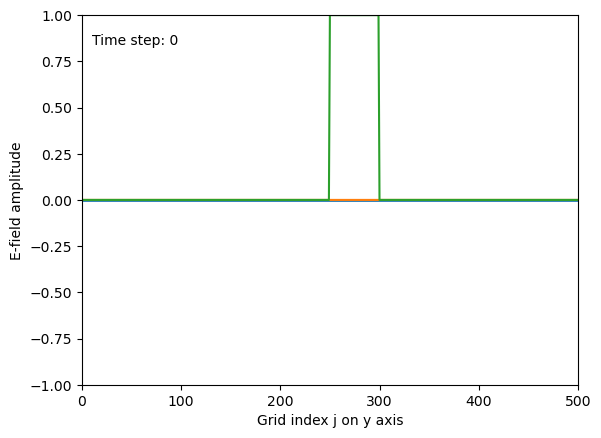

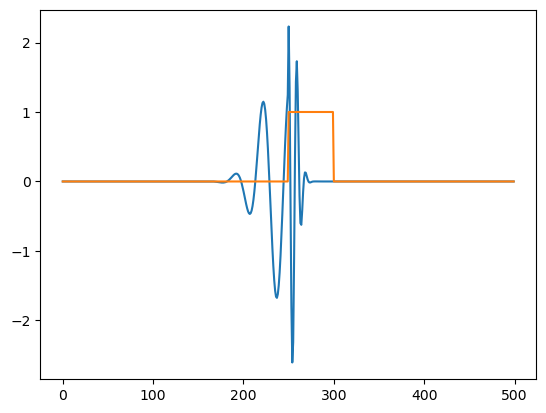

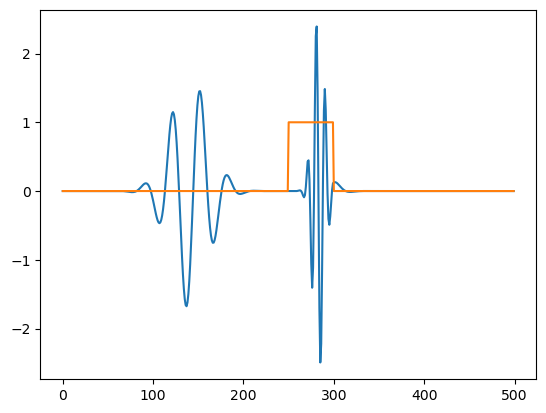

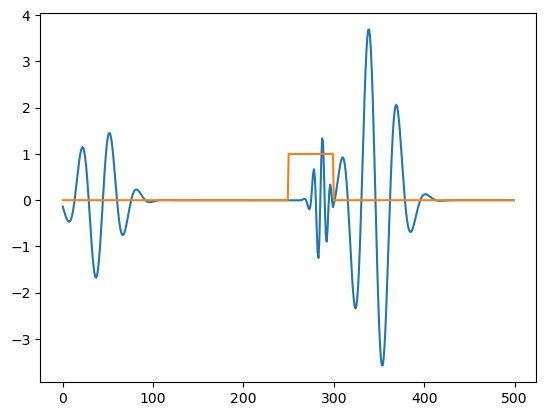

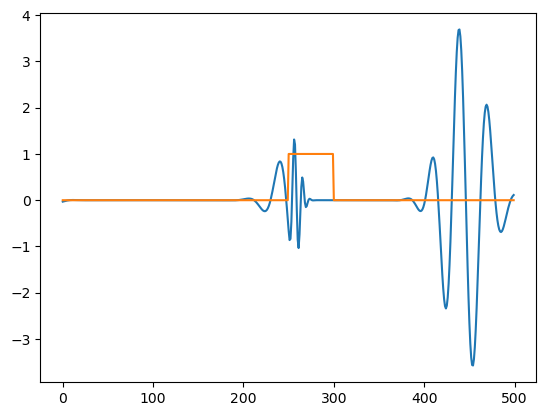

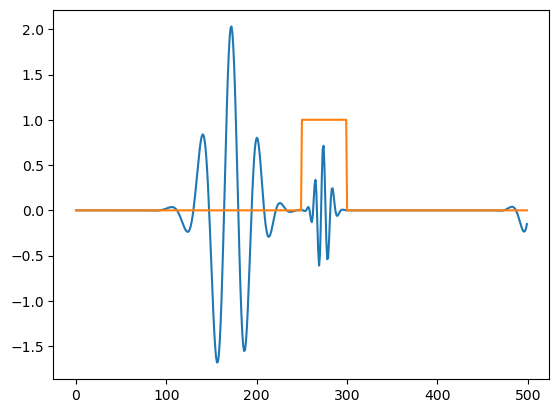

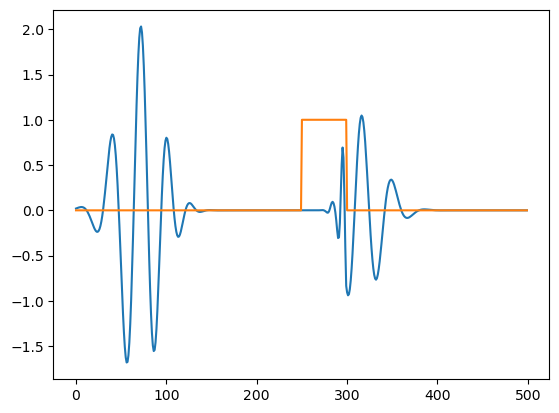

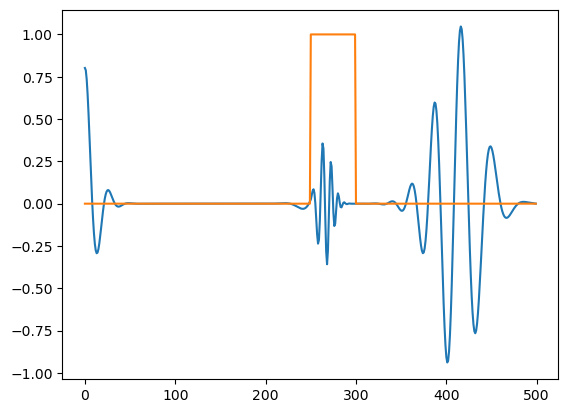

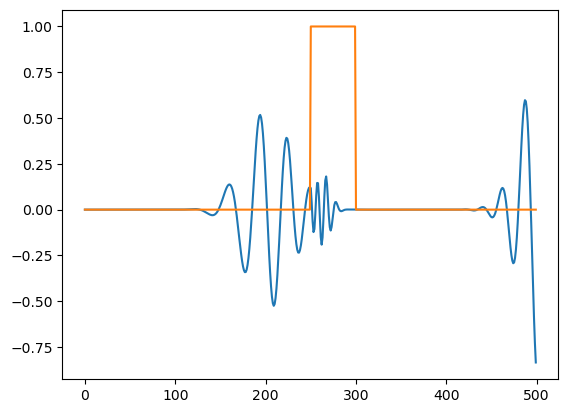

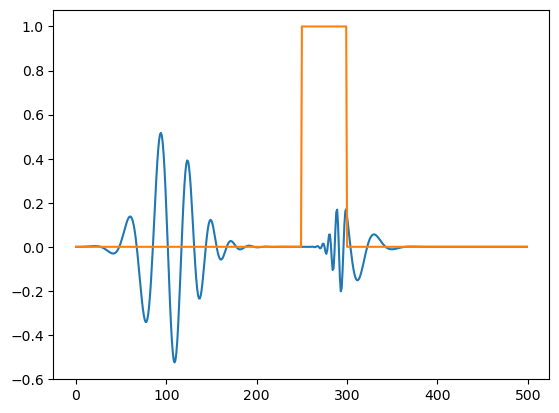

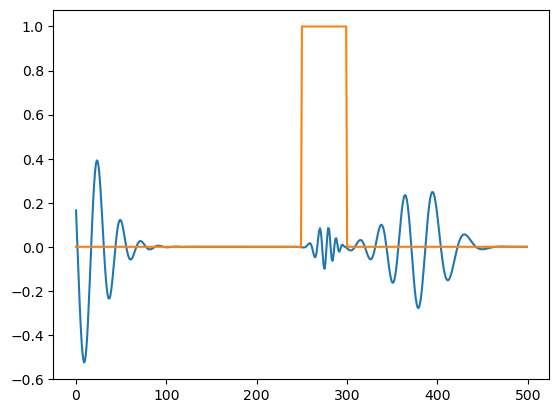

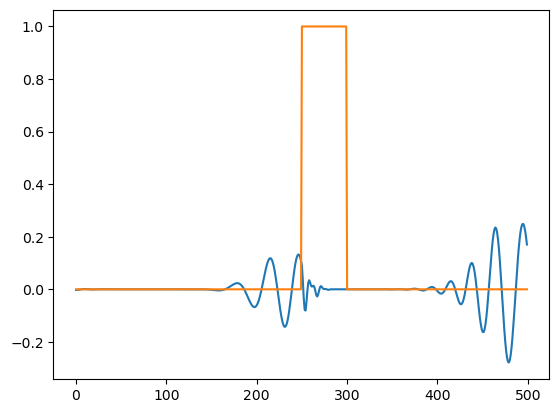

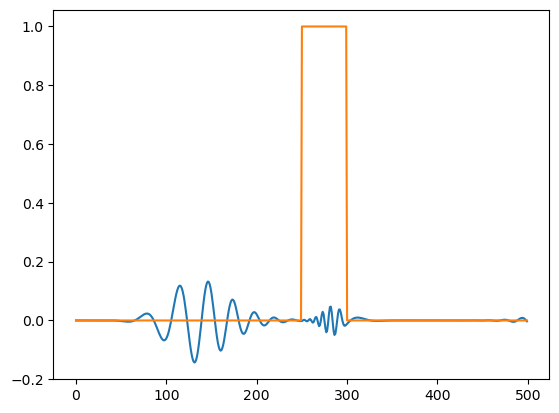

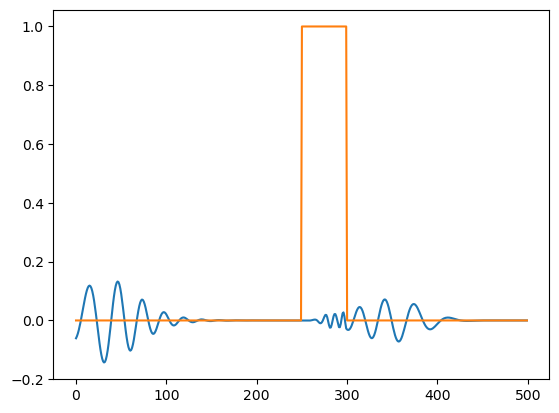

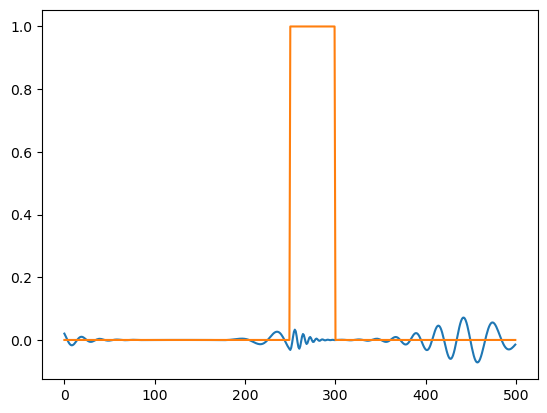

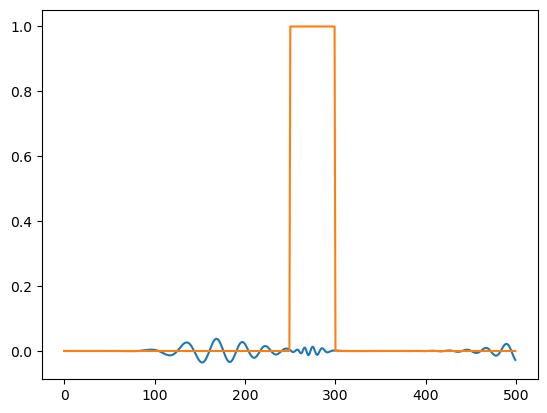

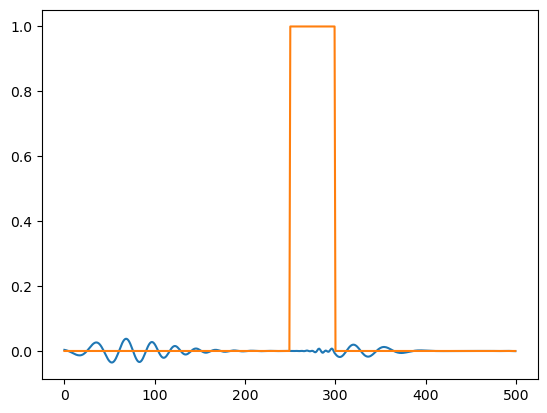

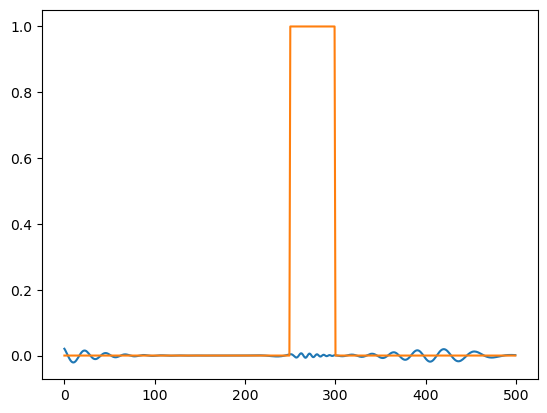

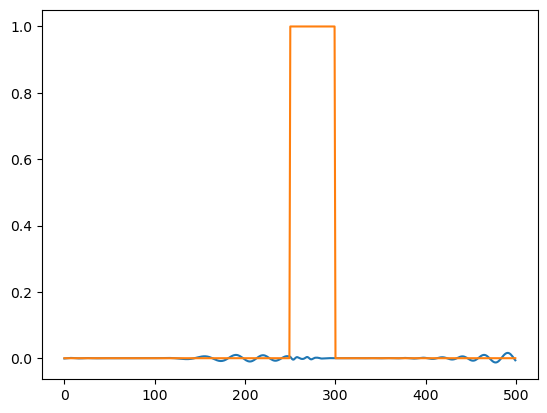

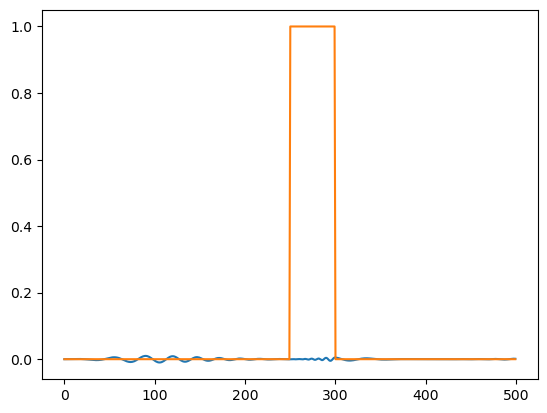

In [ ]:
#The loop, Simulating light in a vacuum with thin film

for n in range(n_max):
    #update magnetic field boundaries, if we want the wave to propagate off the screen, if we delete them, the wave will bounce (Mirror)
    H_z[j_max-1] = H_z_prev[j_max-2]
    #update magnetic field
    for j in range(j_max-1):
        H_z[:j_max-1] = H_z_prev[:j_max-1] + dt/(dx*mu0) * (E_x[1:j_max]-E_x[:j_max-1])
    H_z_prev[:] = H_z[:]
        
    #can add magnetic field source here, if only E field source and no H field or the other way around, then the EM wave will propagate in both directions
    H_z[j_source-1] -= Source_Func(n)/imp0 # dividing by impedance is important for only one wave propagating
    H_z_prev[j_source-1] = H_z[j_source-1]
    
    #update electric field boundaries, if we want the wave to propagate off the screen, if we delete them, the wave will bounce (Mirror)
    E_x[0] = E_x_prev[1]
    #update electric field

    E_x[1:] = E_x_prev[1:] + dt/(dx*eps[1:]) * (H_z[1:]-H_z[:j_max-1])
    E_x_prev[:] = E_x[:]
                
    #can add Electric field source here, if only E field source and no H field or the other way around, then the EM wave will propagate in both directions
    E_x[j_source] += Source_Func(n+1)
    E_x_prev[j_source] = E_x[j_source]
    
    #plot at every 10th time step
    if n%100 == 0:
        plt.plot(E_x)
        plt.plot(material_prof)
        #plt.ylim([-1,1])
        plt.show()
        plt.close()